# BIBLIOTECAS

In [1]:
import pandas as pd 
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# DATASETS

In [2]:
features = pd.read_csv(r'/Users/daianeklein/Documents/Cursos/cursos-bootcamps/Udemy/Churn-Clientes/kdd/orange_small_test.data', 
                       na_filter=False, engine='python', sep='\t')

features.head(3)       

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,,,,,,1225,7,,,,...,Al6ZaUT,P6pu4Vl,LM8l689qOp,,ELof,7P5s,ZI9m,R4y5gQQWY8OodqDV,,
1,,,,,,259,0,,,,...,oslk,S46Rt72,LM8l689qOp,,,Qu4f,RAYp,F2FyR07IdsN7I,,
2,,,,,,861,14,,,,...,oslk,CcdTy9x,LM8l689qOp,,,7aLG,RAYp,F2FyR07IdsN7I,,


In [3]:
outcome = pd.read_csv(r'/Users/daianeklein/Documents/Cursos/cursos-bootcamps/Udemy/Churn-Clientes/kdd/orange_small_train_churn.labels',
                     header=None)

outcome.head(3)

,0
0,-1
1,1
2,-1


## IDENTIFICANDO VARIAVEIS NUMERICAS E CATEGORICAS

In [4]:
#todas as variaveis
all_vars = np.array(features.columns)

#Variaveis numericas
num_vars = np.array(all_vars[:190])

#Variaveis categoricas
cat_vars = np.array(all_vars[190:])

## TIPO DE DADOS

In [5]:
#Tipo de dados
features.dtypes

Var1      object
Var2      object
Var3      object
Var4      object
Var5      object
           ...  
Var226    object
Var227    object
Var228    object
Var229    object
Var230    object
Length: 230, dtype: object

In [6]:
# Verificando a quantidade de 
var = features.groupby('Var1').size()
var 

Var1
        49312
0         367
104         1
120         1
1288        1
16         73
168         1
24         39
248         1
32         26
352         1
40          9
48         10
56          4
64          2
72          4
8         145
80          3
dtype: int64

In [7]:
# Agrupando as variaveis numericas 
counts_per_column = pd.DataFrame()

for col in num_vars:
    col_count = features.groupby(col).size()
    counts_per_column = counts_per_column.append(col_count, ignore_index=True)

In [8]:
# Visualizando
counts_per_column.T.head()

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
,49312.0,48716.0,48718.0,48362.0,48494.0,5609.0,5623.0,50000.0,49312.0,48494.0,...,5116.0,48362.0,48716.0,48716.0,50000.0,49312.0,49312.0,48716.0,28914.0,49652.0
0,367.0,1280.0,1063.0,1619.0,901.0,899.0,12869.0,NaN,123.0,912.0,...,42072.0,730.0,858.0,799.0,NaN,506.0,203.0,66.0,NaN,3.0
104,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
120,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,114.0,NaN
1288,1.0,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Verificando se as variaveis numericas estao corretas (se são somente numericas mesmo)
counts_per_column = counts_per_column.T
counts_per_column.index = counts_per_column.index.astype('str')
counts_per_column.sort_index(inplace = True)

print('Primeiras dez categorias', counts_per_column.index[:10])
print('Ultimas dez categorias', counts_per_column.index[(len(counts_per_column.index)-10):])

Primeiras dez categorias Index(['', '-10', '-100.4284', '-1000068.0', '-1000248.0', '-10003.28',
       '-100034.4', '-10004.56', '-100051.2', '-1000696.0'],
      dtype='object')
Ultimas dez categorias Index(['9999360', '999945', '99995', '9999560', '99996', '999960', '9999760',
       '9999840', '99999', '999990'],
      dtype='object')


In [10]:
# Verificando as variaveis categoricas

# Agrupando
counts_per_column = pd.DataFrame()

for col in cat_vars:
    col_count = features.groupby(col).size()
    counts_per_column = counts_per_column.append(col_count, ignore_index=True)
    
# Verificando se as variaveis numericas estao corretas (se são somente numericas mesmo)
counts_per_column = counts_per_column.T
counts_per_column.index = counts_per_column.index.astype('str')
counts_per_column.sort_index(inplace = True)

print('Primeiras dez categorias', counts_per_column.index[:10])
print('Ultimas dez categorias', counts_per_column.index[(len(counts_per_column.index)-10):])

Primeiras dez categorias Index(['', '000J', '0062', '008H', '00AD', '00ARusu', '00AYONy', '00J8E9a',
       '00JHTSP', '00Pj'],
      dtype='object')
Ultimas dez categorias Index(['zzQxqki', 'zzbGa54', 'zzbNZfq', 'zzfHvGh', 'zzfLM_S', 'zzfTzdd',
       'zzfUfAI', 'zzfXviP', 'zzpZ', 'zzyzW_O_YFGHV'],
      dtype='object')


In [11]:
# Substituindo os valores nulos por NaN
features = features.replace('', np.nan)

features.head(3)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1225,7,NaN,NaN,NaN,...,Al6ZaUT,P6pu4Vl,LM8l689qOp,NaN,ELof,7P5s,ZI9m,R4y5gQQWY8OodqDV,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,259,0,NaN,NaN,NaN,...,oslk,S46Rt72,LM8l689qOp,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,861,14,NaN,NaN,NaN,...,oslk,CcdTy9x,LM8l689qOp,NaN,NaN,7aLG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [12]:
# Alterando o tipo de dados
for col in num_vars:
    features[col] = features[col].astype('float')

for col in cat_vars:
    features[col] = features[col].astype('object')
    
features.dtypes

Var1      float64
Var2      float64
Var3      float64
Var4      float64
Var5      float64
           ...   
Var226     object
Var227     object
Var228     object
Var229     object
Var230     object
Length: 230, dtype: object

# SELEÇÃO DE VARIÁVEIS

In [13]:
#Verificando as variaveis com valores faltantes
features.isna()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,True,True
1,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
2,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
3,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
4,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
49996,True,True,True,True,True,False,False,True,True,True,...,False,False,True,True,True,False,False,False,True,True
49997,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
49998,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True


In [14]:
# Verificando quantos dados em branco há em cada coluna
empty_entries_per_columns = features.isna().sum(axis = 0)
empty_entries_per_columns

Var1      49312
Var2      48716
Var3      48718
Var4      48362
Var5      48494
          ...  
Var226        0
Var227        0
Var228        0
Var229    28432
Var230    50000
Length: 230, dtype: int64

48494.0


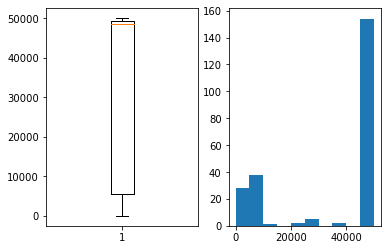

In [15]:
# Plotando os dados para verificar a quantidade de dados faltantes
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(empty_entries_per_columns)
ax2.hist(empty_entries_per_columns)
median = empty_entries_per_columns.median()

print(median)

In [16]:
# mantendo as variaveis que possuem, pelo menos, 75% de valores preenchidos
num_entries = len(features)
threshold = 0.25
num_entries * threshold

12500.0

In [19]:
# Variaveis que serão mantidas
keep_vars = np.array(features.columns[(empty_entries_per_columns <= (num_entries * threshold))])
keep_vars

array(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25',
       'Var28', 'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73',
       'Var74', 'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var109',
       'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var132',
       'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149',
       'Var153', 'Var160', 'Var163', 'Var173', 'Var181', 'Var192',
       'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199',
       'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207',
       'Var208', 'Var210', 'Var211', 'Var212', 'Var216', 'Var217',
       'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223',
       'Var226', 'Var227', 'Var228'], dtype=object)

In [20]:
# Selecionando somente as variaveis dentro da regra acima
num_vars = [elem for elem in num_vars if elem in keep_vars]
cat_vars = [elem for elem in cat_vars if elem in keep_vars]

print(len(num_vars))
print(len(cat_vars))

38
28


In [22]:
# preenchendo os NaN pela média
for col in num_vars:
    col_mean = features[col].mean()
    features[col] = features[col].fillna(col_mean)
    
# preenchendo os NaN por 'missig'
for col in cat_vars:
    features[col] = features[col].fillna('missing')

In [34]:
# Verificando quantas diferentes categorias existe em cada variavel (coluna)
n_categories_per_feature = features[cat_vars].apply(lambda x: len(set(x)))
n_categories_per_feature

Var192      367
Var193       47
Var195       22
Var196        4
Var197      233
Var198     4259
Var199     5153
Var202     5701
Var203        5
Var204      102
Var205        4
Var206       23
Var207       14
Var208        3
Var210        7
Var211        2
Var212       81
Var216     2046
Var217    14101
Var218        3
Var219       21
Var220     4259
Var221        7
Var222     4259
Var223        5
Var226       25
Var227        7
Var228       30
dtype: int64

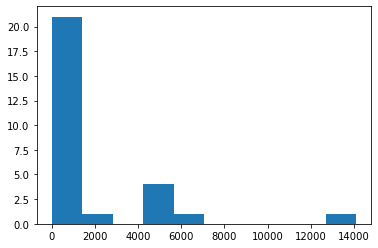

In [36]:
# visualizando a qt. de categorias
plt.hist(n_categories_per_feature);

In [37]:
# Filtrando somente as variaveis que possuem até 1.400 registros únicos
cat_vars = np.array(n_categories_per_feature[n_categories_per_feature < 1400].index)
cat_vars

array(['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var203',
       'Var204', 'Var205', 'Var206', 'Var207', 'Var208', 'Var210',
       'Var211', 'Var212', 'Var218', 'Var219', 'Var221', 'Var223',
       'Var226', 'Var227', 'Var228'], dtype=object)

In [39]:
# concatenando as duas variaveis (numericas e categoricas)
features = features[list(num_vars) + list(cat_vars)]
features

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var210,Var211,Var212,Var218,Var219,Var221,Var223,Var226,Var227,Var228
0,1225.0,7.0,100.0,156.0,195.0,0.0,72.0,166.56,0.0,4259232.0,...,uKAI,L84s,H4p93_uThXwSG,cJvF,FzaX,Al6ZaUT,LM8l689qOp,7P5s,ZI9m,R4y5gQQWY8OodqDV
1,259.0,0.0,0.0,192.0,240.0,0.0,40.0,300.32,5.0,4859550.0,...,uKAI,L84s,NhsEn4L,cJvF,FzaX,oslk,LM8l689qOp,Qu4f,RAYp,F2FyR07IdsN7I
2,861.0,14.0,236.0,32.0,40.0,0.0,8.0,186.64,0.0,10038840.0,...,uKAI,L84s,NhsEn4L,cJvF,FzaX,oslk,LM8l689qOp,7aLG,RAYp,F2FyR07IdsN7I
3,1568.0,7.0,1232.0,448.0,560.0,4.0,88.0,166.56,0.0,116760.0,...,uKAI,L84s,XfqtO3UdzaXh_,UYBR,AU8pNoi,oslk,LM8l689qOp,7P5s,RAYp,TCU50_Yjmm6GIBZ0lL_
4,1197.0,7.0,204.0,100.0,125.0,8.0,40.0,133.12,0.0,257772.0,...,uKAI,L84s,H4p93_uThXwSG,cJvF,FzaX,Al6ZaUT,LM8l689qOp,5Acm,ZI9m,iyHGyLCEkQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3367.0,7.0,1988.0,440.0,550.0,6.0,352.0,133.12,0.0,0.0,...,uKAI,L84s,a3CcPDe,UYBR,FzaX,QKW8DRm,LM8l689qOp,Qu4f,ZI9m,NoEd
49996,182.0,0.0,0.0,28.0,35.0,0.0,0.0,186.64,0.0,14783100.0,...,uKAI,L84s,CrNX,cJvF,missing,d0EEeJi,missing,Xa3G,02N6s8f,F2FyR07IdsN7I
49997,525.0,0.0,0.0,136.0,170.0,0.0,48.0,300.32,0.0,5304786.0,...,uKAI,Mtgm,NhsEn4L,cJvF,FzaX,oslk,jySVZNlOJy,Aoh3,RAYp,F2FyR07IdsN7I
49998,1582.0,21.0,196.0,264.0,330.0,6.0,112.0,186.64,0.0,28710.0,...,uKAI,L84s,NhsEn4L,UYBR,FzaX,oslk,jySVZNlOJy,FSa2,RAYp,F2FyR07IdsN7I


# SELEÇÃO DAS VARIÁVEIS

***

## ÁRVORE DE DECISÃO

In [41]:
# variaveis dummies (transformando as variaveis categoricas)
features_c = pd.get_dummies(features)
features_c.shape

(50000, 1050)

In [42]:
features_c.head(6)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var228__URKn_77G3QyQHSVQ2N1RKmtW,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0
0,1225.000000,7.000000,100.000000,156.000000,195.000000,0.000000,72.000000,166.560000,0.000000,4.259232e+06,...,0,0,0,0,0,0,0,0,0,0
1,259.000000,0.000000,0.000000,192.000000,240.000000,0.000000,40.000000,300.320000,5.000000,4.859550e+06,...,0,0,0,0,0,0,0,0,0,0
2,861.000000,14.000000,236.000000,32.000000,40.000000,0.000000,8.000000,186.640000,0.000000,1.003884e+07,...,0,0,0,0,0,0,0,0,0,0
3,1568.000000,7.000000,1232.000000,448.000000,560.000000,4.000000,88.000000,166.560000,0.000000,1.167600e+05,...,0,0,0,0,0,0,0,0,0,0
4,1197.000000,7.000000,204.000000,100.000000,125.000000,8.000000,40.000000,133.120000,0.000000,2.577720e+05,...,0,0,0,0,0,0,1,0,0,0
5,1355.728481,6.885323,1254.057372,241.471109,299.857187,4.704754,100.435612,224.047372,0.719299,2.556581e+06,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Criando uma funcao para calcular a importancia de cada variavel
def etc_importances(features, outcome):
    model = ExtraTreesClassifier(n_estimators=200, criterion='entropy', verbose=0)
    model.fit(features, np.array(outcome).ravel())
    
    importances = model.feature_importances_
    variables = np.array(features.columns)
    indices = np.argsort(importances)[::-1]
    importances = importances[indices]
    variables =variables[indices]
    
    return variables, importances

variables, importances = etc_importances(features_c, outcome)

In [59]:
#Verificando a qt. ideal de atributos
def sum_and_plot_importances(variables, importances):
    sum_importances = pd.DataFrame()
    for i in range(importances.size):
        sum_importance = importances[:(i+1)].sum()
        this_variable = pd.Series([variables[i], sum_importance])
        sum_importances = sum_importances.append(this_variable, ignore_index= True)
    plt.scatter(sum_importances.index, sum_importances.iloc[:,1])
    return sum_importances

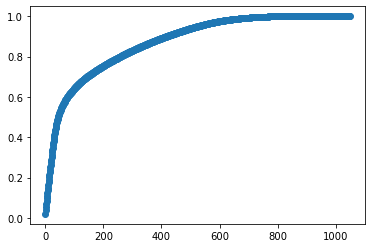

In [60]:
sum_importances = sum_and_plot_importances(variables, importances)